In [1]:
from joblib import load
from pandas import set_option, read_csv
from numpy import quantile, unique, sort, argsort, array
from os.path import basename, split
from matplotlib.pyplot import subplots, show

set_option('display.max_columns', None)
set_option('display.max_rows', 200)

from lqid import img2matrix, quickshow

In [2]:
model_multi = load("model_random_forest_multi.joblib")
df_public = read_csv("df_public.csv")
array_number = array([int(basename(x).split("_")[0]) for x in df_public["path"]])
df_public = df_public.loc[array_number > 250, :]

In [3]:
predictions = model_multi.predict_proba(df_public.loc[:, ~df_public.columns.isin(("target", "path", "dataset"))])

In [4]:
argsort_preds = argsort(predictions, axis=1)
sort_preds = sort(predictions, axis=1)

df_public["pred_idx_top1"] = argsort_preds[:, -1]
df_public["pred_idx_top2"] = argsort_preds[:, -2]
df_public["pred_idx_top3"] = argsort_preds[:, -3]
df_public["pred_proba_top1"] = sort_preds[:, -1]
df_public["pred_proba_top2"] = sort_preds[:, -2]
df_public["pred_proba_top3"] = sort_preds[:, -3]

In [5]:
list_target = ['sharp', 'defocused_blurred', 'motion_blurred', 'blur', 'band', 'noise', 'exposure', 'glare', 'dark', 'constant']

df_public["pred_top1"] = [list_target[idx] for idx in df_public["pred_idx_top1"]]
df_public["pred_top2"] = [list_target[idx] for idx in df_public["pred_idx_top2"]]
df_public["pred_top3"] = [list_target[idx] for idx in df_public["pred_idx_top3"]]

df_public["correct"] = "WRONG"
df_public.loc[(df_public["target"] == df_public["pred_top1"]), ["correct"]] = "CORRECT"

In [6]:
#df_public.loc[:, ["path", "target", "pred_top1", "pred_proba_top1", "pred_top2", "pred_proba_top2", "pred_top3", "pred_proba_top3", ]]

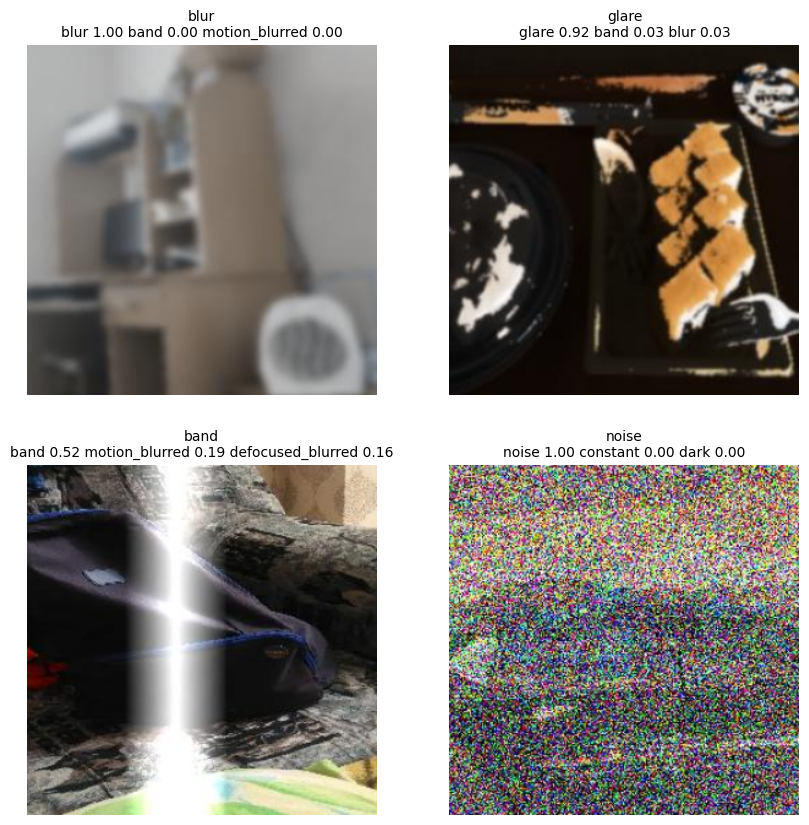

In [19]:
fig, axes = subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, row in df_public.loc[df_public["correct"] == "CORRECT"].sample(4).reset_index(0).iterrows():
    axes.flat[i].set_title(
        "%s\n%s %.2f %s %.2f %s %.2f" \
            % (
                split(split(row["path"])[0])[-1], 
                row["pred_top1"], row["pred_proba_top1"], 
                row["pred_top2"], row["pred_proba_top2"], 
                row["pred_top3"], row["pred_proba_top3"]
            )
        )
    axes.flat[i].title.set_fontsize(10)
    axes.flat[i].imshow(img2matrix(row["path"])["rgb"])
    axes.flat[i].axis("off")

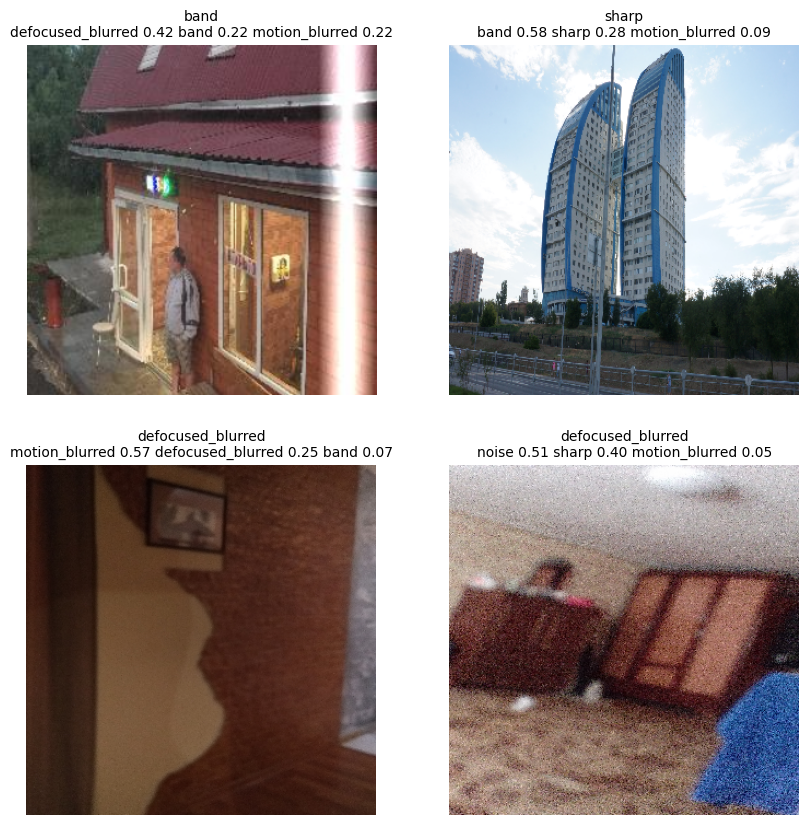

In [24]:
fig, axes = subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, row in df_public.loc[df_public["correct"] == "WRONG"].sample(4).reset_index(0).iterrows():
    axes.flat[i].set_title(
        "%s\n%s %.2f %s %.2f %s %.2f" \
            % (
                split(split(row["path"])[0])[-1], 
                row["pred_top1"], row["pred_proba_top1"], 
                row["pred_top2"], row["pred_proba_top2"], 
                row["pred_top3"], row["pred_proba_top3"]
            )
        )
    axes.flat[i].title.set_fontsize(10)
    axes.flat[i].imshow(img2matrix(row["path"])["rgb"])
    axes.flat[i].axis("off")